In [32]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
import random
from torch.utils.data import DataLoader, Subset, random_split
import torch.nn.functional as F

In [3]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

# Load the training and test sets
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

In [4]:
# loading cifar into 2 loaders

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
])

# Download and load the CIFAR-10 dataset
train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)

# Split the dataset into two parts, each with 3000 examples per class
labels = torch.tensor(train_dataset.targets)

indices1 = []
indices2 = []

for label in range(10):
    label_indices = (labels == label).nonzero(as_tuple=True)[0]
    indices1.extend(label_indices[:3000].tolist())
    indices2.extend(label_indices[3000:6000].tolist())

subset1 = Subset(train_dataset, indices1)
subset2 = Subset(train_dataset, indices2)

# Create DataLoaders for both subsets
batch_size = 64  

dataloader1 = DataLoader(subset1, batch_size=batch_size, shuffle=True)
dataloader2 = DataLoader(subset2, batch_size=batch_size, shuffle=True)

100.0%


Extracting ./data\cifar-10-python.tar.gz to ./data


In [24]:
def split_dataloader(dataloader, train_ratio=0.8, batch_size=64, shuffle=True, random_seed=42):
    """
    Splits a DataLoader into train and test DataLoaders based on a specified train_ratio.

    Parameters:
    - dataloader: The original DataLoader to be split.
    - train_ratio: The ratio of data to be used for training. Default is 0.8 (80% train, 20% test).
    - batch_size: Batch size for the new DataLoaders.
    - shuffle: Whether to shuffle the data before splitting. Default is True.
    - random_seed: Random seed for reproducibility.

    Returns:
    - train_loader: DataLoader for the training set.
    - test_loader: DataLoader for the testing set.
    """

    # Set the random seed for reproducibility
    torch.manual_seed(random_seed)
    
    # Get the length of the dataset
    dataset = dataloader.dataset
    dataset_size = len(dataset)
    
    # Calculate the number of samples for training and testing
    train_size = int(train_ratio * dataset_size)
    test_size = dataset_size - train_size
    
    # Split the dataset into training and testing subsets
    train_dataset, test_dataset = random_split(dataset, [train_size, test_size])
    
    # Create new DataLoaders for the split datasets
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=shuffle)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=shuffle)
    
    return train_loader, test_loader

In [78]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)  # Flatten the image
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x


In [79]:
net1 = Net()
net2 = Net()

In [96]:
cnn4 = CNNet()

In [97]:
train(cnn4, epochs=1, trainloader=trainloader)

Epoch 1, Mini-batch 100, Loss: 1.296
Epoch 1, Mini-batch 200, Loss: 0.286
Epoch 1, Mini-batch 300, Loss: 0.180
Epoch 1, Mini-batch 400, Loss: 0.136
Epoch 1, Mini-batch 500, Loss: 0.105
Epoch 1, Mini-batch 600, Loss: 0.095
Epoch 1, Mini-batch 700, Loss: 0.092
Epoch 1, Mini-batch 800, Loss: 0.095
Epoch 1, Mini-batch 900, Loss: 0.079
Finished Training


[129.62526819109917,
 28.582204096019268,
 17.95888676121831,
 13.579946616664529,
 10.452190211042762,
 9.476600084453821,
 9.164975552354008,
 9.536343226209283,
 7.890852652024478]

In [99]:
test(cnn4)

Accuracy of the network on the 10000 test images: 98.3%


In [80]:
train(net1)

Epoch 1, Mini-batch 100, Loss: 1.363
Epoch 1, Mini-batch 200, Loss: 0.506
Epoch 1, Mini-batch 300, Loss: 0.366
Epoch 1, Mini-batch 400, Loss: 0.356
Epoch 1, Mini-batch 500, Loss: 0.319
Epoch 1, Mini-batch 600, Loss: 0.295
Epoch 1, Mini-batch 700, Loss: 0.267
Epoch 1, Mini-batch 800, Loss: 0.256
Epoch 1, Mini-batch 900, Loss: 0.234
Epoch 2, Mini-batch 100, Loss: 0.202
Epoch 2, Mini-batch 200, Loss: 0.193
Epoch 2, Mini-batch 300, Loss: 0.195
Epoch 2, Mini-batch 400, Loss: 0.183
Epoch 2, Mini-batch 500, Loss: 0.183
Epoch 2, Mini-batch 600, Loss: 0.173
Epoch 2, Mini-batch 700, Loss: 0.173
Epoch 2, Mini-batch 800, Loss: 0.175
Epoch 2, Mini-batch 900, Loss: 0.153
Epoch 3, Mini-batch 100, Loss: 0.140
Epoch 3, Mini-batch 200, Loss: 0.140
Epoch 3, Mini-batch 300, Loss: 0.142
Epoch 3, Mini-batch 400, Loss: 0.151
Epoch 3, Mini-batch 500, Loss: 0.144
Epoch 3, Mini-batch 600, Loss: 0.122
Epoch 3, Mini-batch 700, Loss: 0.109
Epoch 3, Mini-batch 800, Loss: 0.129
Epoch 3, Mini-batch 900, Loss: 0.121
E

[136.27704900503159,
 50.586929485201836,
 36.60326337814331,
 35.587086737155914,
 31.851025313138962,
 29.46430104225874,
 26.70712572336197,
 25.641896188259125,
 23.366505205631256,
 20.16292269527912,
 19.275835547596216,
 19.527765799313784,
 18.28169123455882,
 18.305038625374436,
 17.28074126690626,
 17.27339657768607,
 17.500063579529524,
 15.301989713683724,
 13.998991429805756,
 14.007547438144684,
 14.223291136324406,
 15.051308484748006,
 14.411808280274272,
 12.194569896906614,
 10.93983118981123,
 12.852566502988338,
 12.131647419184446,
 10.326047390699387,
 11.336209951434284,
 11.052808100357652,
 10.09579398110509,
 11.681564297527075,
 10.502250794321299,
 10.703099182806909,
 10.053860764950514,
 10.036394903436303,
 8.982293792068958,
 9.637711009476334,
 8.836749227717519,
 7.87743735127151,
 8.966556027531624,
 8.639450509101152,
 8.886883947998285,
 9.291011868976057,
 9.859741013031453]

In [81]:
train(net2)

Epoch 1, Mini-batch 100, Loss: 1.326
Epoch 1, Mini-batch 200, Loss: 0.476
Epoch 1, Mini-batch 300, Loss: 0.355
Epoch 1, Mini-batch 400, Loss: 0.366
Epoch 1, Mini-batch 500, Loss: 0.329
Epoch 1, Mini-batch 600, Loss: 0.289
Epoch 1, Mini-batch 700, Loss: 0.268
Epoch 1, Mini-batch 800, Loss: 0.250
Epoch 1, Mini-batch 900, Loss: 0.213
Epoch 2, Mini-batch 100, Loss: 0.199
Epoch 2, Mini-batch 200, Loss: 0.212
Epoch 2, Mini-batch 300, Loss: 0.186
Epoch 2, Mini-batch 400, Loss: 0.176
Epoch 2, Mini-batch 500, Loss: 0.175
Epoch 2, Mini-batch 600, Loss: 0.161
Epoch 2, Mini-batch 700, Loss: 0.182
Epoch 2, Mini-batch 800, Loss: 0.142
Epoch 2, Mini-batch 900, Loss: 0.161
Epoch 3, Mini-batch 100, Loss: 0.147
Epoch 3, Mini-batch 200, Loss: 0.126
Epoch 3, Mini-batch 300, Loss: 0.132
Epoch 3, Mini-batch 400, Loss: 0.131
Epoch 3, Mini-batch 500, Loss: 0.136
Epoch 3, Mini-batch 600, Loss: 0.132
Epoch 3, Mini-batch 700, Loss: 0.131
Epoch 3, Mini-batch 800, Loss: 0.112
Epoch 3, Mini-batch 900, Loss: 0.118
E

[132.64659988880157,
 47.612104684114456,
 35.547847032547,
 36.56883546710014,
 32.92158883810043,
 28.903061971068382,
 26.777325443923473,
 25.01000677794218,
 21.2754615098238,
 19.914443783462048,
 21.248929552733898,
 18.578615836799145,
 17.5986512824893,
 17.469423221424222,
 16.080454939976335,
 18.188047260046005,
 14.15518144145608,
 16.100088853389025,
 14.718595555052161,
 12.585319662466645,
 13.19707571901381,
 13.087241109460592,
 13.630338702350855,
 13.22322672791779,
 13.099187597632408,
 11.188535275869071,
 11.827212192118168,
 9.866035228595138,
 9.980314483866096,
 9.545489951968193,
 9.997662761248648,
 10.916717963293195,
 9.569083250593394,
 11.10439498629421,
 10.662500189617276,
 10.479780277237296,
 10.582108026370406,
 9.06797226704657,
 8.65645758761093,
 8.26712273620069,
 8.330238589085639,
 9.524385642260313,
 9.456739564426243,
 7.670606732368469,
 8.838785528670996]

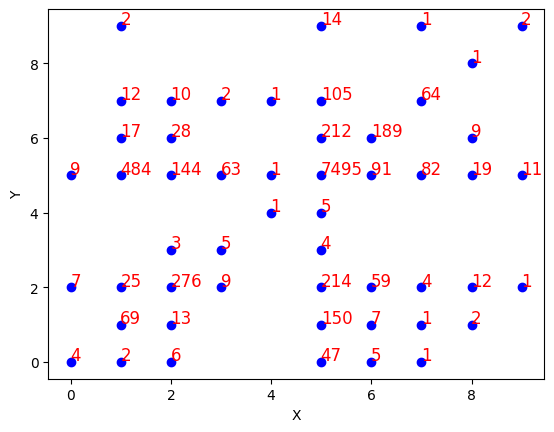

0.8106

In [83]:
xs, ys = random_hash_answers(net1, net2, iterations=10000, hashes=(0,0))
plot_2d_hist(xs, ys)

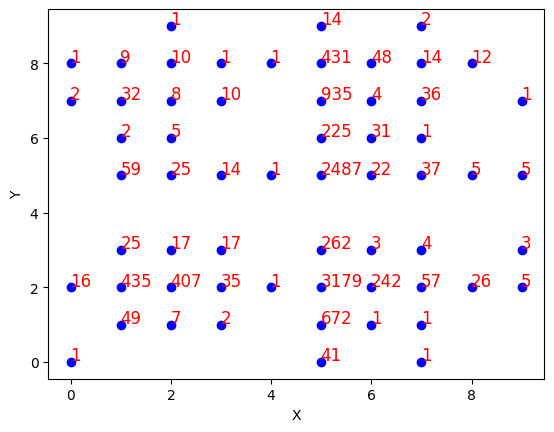

0.304

In [84]:
xs, ys = random_hash_answers(net1, cnn1, iterations=10000, hashes=(0,0))
plot_2d_hist(xs, ys)

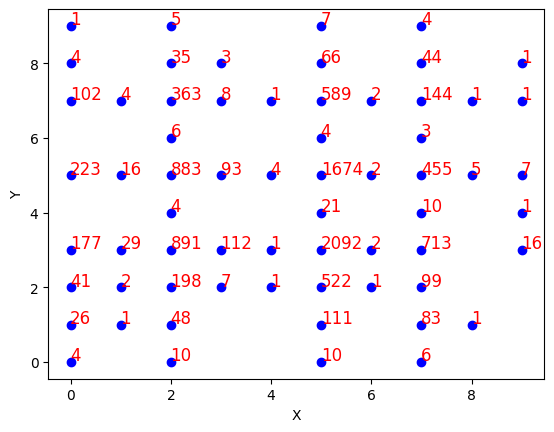

0.2133

In [91]:
xs, ys = random_hash_answers(cnn2, cnn3, iterations=10000, hashes=(42,179))
plot_2d_hist(xs, ys)

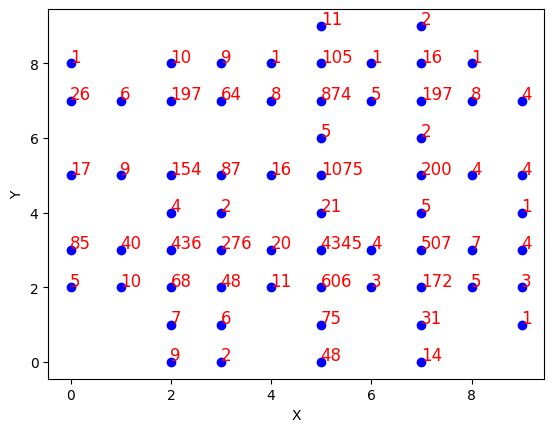

0.1617

In [88]:
xs, ys = random_hash_answers(cnn2, cnn3, iterations=10000, hashes=(179,42))
plot_2d_hist(xs, ys)

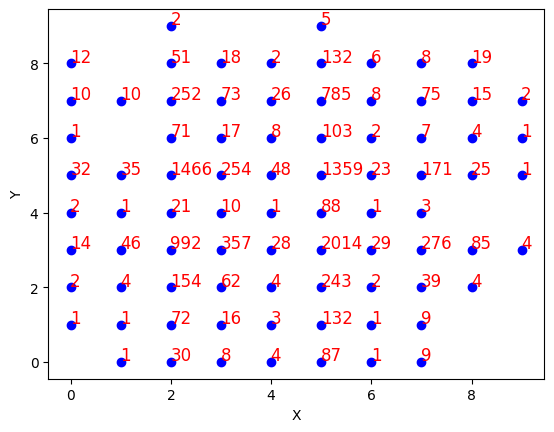

0.1968

In [92]:
xs, ys = random_hash_answers(cnn2, cnn3, iterations=10000, hashes=(0,0))
plot_2d_hist(xs, ys)

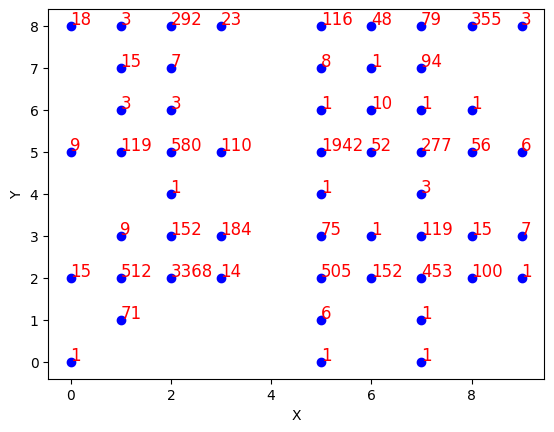

0.6025

In [101]:
xs, ys = random_hash_answers(cnn1, cnn4, iterations=10000, hashes=(0,0))
plot_2d_hist(xs, ys)

In [95]:
test(cnn2, testloader=encodedtestloader)

Accuracy of the network on the 10000 test images: 94.02%


In [5]:
class CNNet(nn.Module):
    def __init__(self):
        super(CNNet, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 10)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.pool(self.relu(self.conv1(x)))
        x = self.pool(self.relu(self.conv2(x)))
        x = x.view(-1, 64 * 7 * 7)
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [72]:
def encode(image, hash_value):
    # Set a random seed based on the hash value for reproducibility
    np.random.seed(hash_value)
    
    # Flatten the image into a 1D array
    flattened_image = image.view(-1)
    
    # Generate a random permutation of indices based on the hash
    permuted_indices = np.random.permutation(len(flattened_image))
    
    # Apply the permutation to the flattened image
    encoded_image = flattened_image[permuted_indices]
    
    # Reshape the encoded image back to its original shape
    encoded_image = encoded_image.view(image.shape)
    
    return encoded_image


def decode(encoded_image, hash_value):
    # Set the random seed based on the hash value to ensure the same permutation
    np.random.seed(hash_value)
    
    # Flatten the encoded image into a 1D array
    flattened_encoded_image = encoded_image.view(-1)
    
    # Generate the same permutation of indices used in encoding
    permuted_indices = np.random.permutation(len(flattened_encoded_image))
    
    # Create an array to store the decoded image
    decoded_image = torch.zeros_like(flattened_encoded_image)
    
    # Reverse the permutation
    decoded_image[permuted_indices] = flattened_encoded_image
    
    # Reshape the decoded image back to its original shape
    decoded_image = decoded_image.view(encoded_image.shape)
    
    return decoded_image

def encode_dataloader(loader, hash_value, cir=False):
    if cir:
        encode = encode_cir
        decode = decode_cir
    encoded_images = []
    encoded_labels = []

    # Encode each image in the original loader
    for images, labels in loader:
        for image in images:
            encoded_image = encode(image, hash_value)
            encoded_images.append(encoded_image)
        encoded_labels.append(labels)

    # Stack the encoded images and labels into tensors
    encoded_images = torch.stack(encoded_images)
    encoded_labels = torch.cat(encoded_labels)

    # Create a new TensorDataset with encoded images
    encoded_dataset = torch.utils.data.TensorDataset(encoded_images, encoded_labels)

    # Create a new DataLoader with the encoded dataset, reusing the original DataLoader's settings
    encoded_loader = torch.utils.data.DataLoader(
        encoded_dataset,
        batch_size=loader.batch_size,
        shuffle=loader.dataset.train  # True if it's a train loader, False otherwise
    )

    return encoded_loader

In [56]:
def draw(tensor):
    # Ensure tensor values are in the range [0, 1]
    tensor_normalized = (tensor + 1) / 2
    
    # Convert tensor to numpy array if it's not already
    if not isinstance(tensor_normalized, np.ndarray):
        tensor_normalized = tensor_normalized.detach().numpy()
    
    # Plot the image
    plt.imshow(tensor_normalized, cmap='gray', vmin=0, vmax=1)
    plt.colorbar()
    plt.show()

def draw_cir(tensor):
    # Ensure tensor is on CPU and convert to NumPy array
    tensor = tensor.cpu().detach().numpy()
    
    # If the tensor is already in the [0, 1] range, no need to normalize
    # tensor_normalized = (tensor + 1) / 2
    
    # Plot the image (no cmap='gray' for RGB images)
    plt.imshow(tensor, vmin=0, vmax=1)
    plt.colorbar()
    plt.show()


In [8]:
def train(net, epochs=5, trainloader=trainloader):
    losses = []
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.9)
    for epoch in range(epochs):
        running_loss = 0.0
        for i, data in enumerate(trainloader, 0):
            inputs, labels = data
    
            # Zero the parameter gradients
            optimizer.zero_grad()
    
            # Forward + backward + optimize
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
    
            # Print statistics
            running_loss += loss.item()
            if i % 100 == 99:  # Print every 100 mini-batches
                print(f'Epoch {epoch + 1}, Mini-batch {i + 1}, Loss: {running_loss / 100:.3f}')
                losses.append(running_loss)
                running_loss = 0.0
    
    print('Finished Training')
    return losses

In [9]:
def test(net, testloader=testloader):
    correct = 0
    total = 0
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            outputs = net(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    
    print(f'Accuracy of the network on the 10000 test images: {100 * correct / total}%')

In [10]:
def plot_2d_hist(xs, ys):
    similarity = 0
    sum = 0
    # Combine xs and ys into a list of (x, y) pairs
    points = list(zip(xs, ys))
    
    # Count occurrences of each (x, y) pair
    point_counts = Counter(points)
    
    # Separate the unique points and their counts
    unique_points = list(point_counts.keys())
    counts = list(point_counts.values())
    
    # Separate the unique points back into xs and ys
    unique_xs, unique_ys = zip(*unique_points)
    
    # Plot the unique points
    plt.scatter(unique_xs, unique_ys, color='blue', marker='o')
    
    # Add labels to each point
    for (x, y), count in zip(unique_points, counts):
        if x==y:
            similarity += count
        sum += count
        plt.text(x-0.01, y+0.04, str(count), fontsize=12, color='red')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()
    return similarity / sum

In [11]:
def get_random_images(n, loader=testloader):
    # Flatten the list of all images and labels in the loader
    all_images = []
    for images, _ in loader:
        all_images.extend(images)
    
    # Select n random images from the list
    random_images = random.sample(all_images, n)

    return random_images

In [75]:
def white_noise_answers(f1, f2, iterations=1000):
    xs = []
    ys = []
    for i in range(iterations):
        im = torch.rand((28, 28)) * 2 - 1
        a1 = list(f1(im.view((1, 28, 28)))[0])
        xs.append(int(a1.index(max(a1))))
        a2 = list(f2(im.view((1, 28, 28)))[0])
        ys.append(int(a2.index(max(a2))))
    return xs, ys

def random_hash_answers(f1, f2, iterations=1000, loader=testloader, hashes=(42, 179)):
    xs = []
    ys = []
    images = get_random_images(iterations, loader=loader)
    images = [encode(image.view(28, 28), 2798) for image in images]
    for im in images:
        im1 = encode(im, hashes[0])
        im2 = encode(im, hashes[1])
        a1 = list(f1(im1.view((1, 28, 28)))[0])
        xs.append(int(a1.index(max(a1))))
        a2 = list(f2(im2.view((1, 28, 28)))[0])
        ys.append(int(a2.index(max(a2))))
    return xs, ys

def random_hash_answers_cir(f1, f2, iterations=1000, loader=testloader):
    xs = []
    ys = []
    images = get_random_images(iterations, loader=loader)
    
    # CIFAR-10 images are 32x32 with 3 color channels
    images = [encode(image.view(32, 32, 3), 2798) for image in images]
    
    for im in images:
        # Adjust the view to match the input size expected by f1 and f2
        a1 = list(f1(im.view((1, 3, 32, 32)))[0])  # Adjust to (1, C, H, W)
        xs.append(int(a1.index(max(a1))))
        
        a2 = list(f2(im.view((1, 3, 32, 32)))[0])
        ys.append(int(a2.index(max(a2))))
    
    return xs, ys

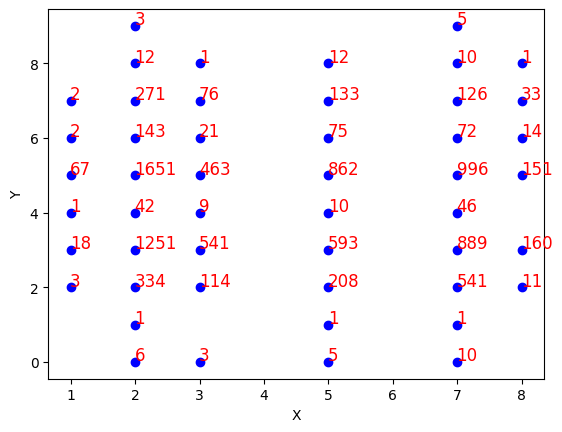

0.1864

In [49]:
xs, ys = random_hash_answers(cnn1, cnn2, iterations=10000)
plot_2d_hist(xs, ys)

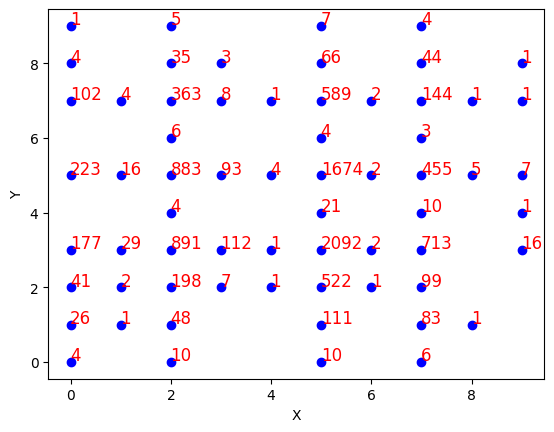

0.2133

In [77]:
xs, ys = random_hash_answers(cnn2, cnn3, iterations=10000)
plot_2d_hist(xs, ys)

In [14]:
cnn1 = CNNet()
cnn2 = CNNet()

In [15]:
hash = 42

In [16]:
encodedtrainloader = encode_dataloader(trainloader, hash)

In [17]:
encodedtestloader = encode_dataloader(testloader, hash)

In [116]:
cnn22 = CNNet()

In [117]:
train(cnn22, epochs=1, trainloader=encodedtrainloader)

Epoch 1, Mini-batch 100, Loss: 1.961
Epoch 1, Mini-batch 200, Loss: 0.742
Epoch 1, Mini-batch 300, Loss: 0.443
Epoch 1, Mini-batch 400, Loss: 0.320
Epoch 1, Mini-batch 500, Loss: 0.313
Epoch 1, Mini-batch 600, Loss: 0.273
Epoch 1, Mini-batch 700, Loss: 0.235
Epoch 1, Mini-batch 800, Loss: 0.219
Epoch 1, Mini-batch 900, Loss: 0.210
Finished Training


[196.11432695388794,
 74.23414388298988,
 44.280063822865486,
 31.993610866367817,
 31.33868508040905,
 27.33808769285679,
 23.517242327332497,
 21.885507076978683,
 21.03531328588724]

In [118]:
test(cnn22, testloader=encodedtestloader)

Accuracy of the network on the 10000 test images: 94.46%


Epoch 1, Mini-batch 100, Loss: 2.024
Epoch 1, Mini-batch 200, Loss: 0.774
Epoch 1, Mini-batch 300, Loss: 0.428
Epoch 1, Mini-batch 400, Loss: 0.361
Epoch 1, Mini-batch 500, Loss: 0.296
Epoch 1, Mini-batch 600, Loss: 0.257
Epoch 1, Mini-batch 700, Loss: 0.237
Epoch 1, Mini-batch 800, Loss: 0.221
Epoch 1, Mini-batch 900, Loss: 0.218
Finished Training
Accuracy of the network on the 10000 test images: 94.13%


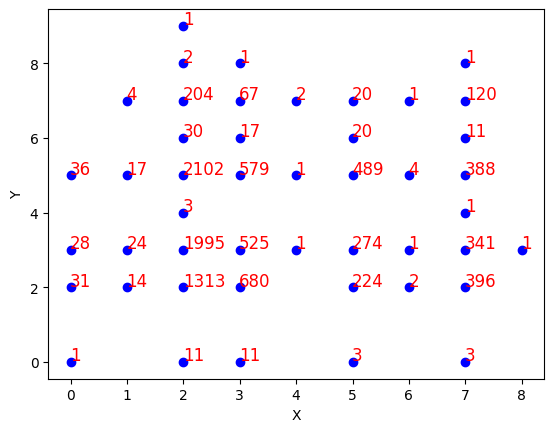

0.2448

In [120]:
cnn23 = CNNet()
train(cnn23, epochs=1, trainloader=encodedtrainloader)
test(cnn23, testloader=encodedtestloader)
xs, ys = random_hash_answers(cnn23, cnn22, iterations=10000)
plot_2d_hist(xs, ys)

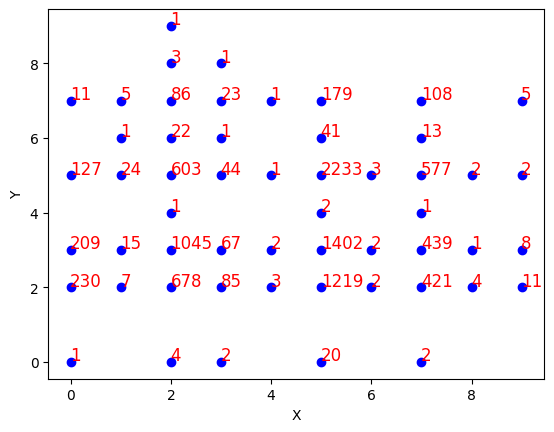

0.3087

In [119]:
xs, ys = random_hash_answers(cnn2, cnn22, iterations=10000)
plot_2d_hist(xs, ys)

In [18]:
train(cnn1, epochs=1, trainloader=trainloader)
train(cnn2, epochs=1, trainloader=encodedtrainloader)

Epoch 1, Mini-batch 100, Loss: 1.263
Epoch 1, Mini-batch 200, Loss: 0.311
Epoch 1, Mini-batch 300, Loss: 0.204
Epoch 1, Mini-batch 400, Loss: 0.139
Epoch 1, Mini-batch 500, Loss: 0.125
Epoch 1, Mini-batch 600, Loss: 0.100
Epoch 1, Mini-batch 700, Loss: 0.091
Epoch 1, Mini-batch 800, Loss: 0.081
Epoch 1, Mini-batch 900, Loss: 0.077
Finished Training
Epoch 1, Mini-batch 100, Loss: 1.832
Epoch 1, Mini-batch 200, Loss: 0.647
Epoch 1, Mini-batch 300, Loss: 0.428
Epoch 1, Mini-batch 400, Loss: 0.333
Epoch 1, Mini-batch 500, Loss: 0.295
Epoch 1, Mini-batch 600, Loss: 0.265
Epoch 1, Mini-batch 700, Loss: 0.246
Epoch 1, Mini-batch 800, Loss: 0.218
Epoch 1, Mini-batch 900, Loss: 0.214
Finished Training


[183.21366691589355,
 64.72371509671211,
 42.78607952594757,
 33.250891983509064,
 29.459513276815414,
 26.507831804454327,
 24.562827102839947,
 21.758422002196312,
 21.39104538410902]

In [19]:
test(cnn1)

Accuracy of the network on the 10000 test images: 97.56%


In [20]:
test(cnn2, testloader=encodedtestloader)

Accuracy of the network on the 10000 test images: 94.02%


In [21]:
hash3 = 179
cnn3 = CNNet()
encodedtrainloader3 = encode_dataloader(trainloader, hash3)
encodedtestloader3 = encode_dataloader(testloader, hash3)
train(cnn3, trainloader=encodedtrainloader3)
test(cnn3, testloader=encodedtestloader3)

Epoch 1, Mini-batch 100, Loss: 1.864
Epoch 1, Mini-batch 200, Loss: 0.620
Epoch 1, Mini-batch 300, Loss: 0.419
Epoch 1, Mini-batch 400, Loss: 0.335
Epoch 1, Mini-batch 500, Loss: 0.264
Epoch 1, Mini-batch 600, Loss: 0.232
Epoch 1, Mini-batch 700, Loss: 0.213
Epoch 1, Mini-batch 800, Loss: 0.208
Epoch 1, Mini-batch 900, Loss: 0.206
Epoch 2, Mini-batch 100, Loss: 0.142
Epoch 2, Mini-batch 200, Loss: 0.151
Epoch 2, Mini-batch 300, Loss: 0.147
Epoch 2, Mini-batch 400, Loss: 0.134
Epoch 2, Mini-batch 500, Loss: 0.148
Epoch 2, Mini-batch 600, Loss: 0.148
Epoch 2, Mini-batch 700, Loss: 0.122
Epoch 2, Mini-batch 800, Loss: 0.118
Epoch 2, Mini-batch 900, Loss: 0.126
Epoch 3, Mini-batch 100, Loss: 0.101
Epoch 3, Mini-batch 200, Loss: 0.092
Epoch 3, Mini-batch 300, Loss: 0.095
Epoch 3, Mini-batch 400, Loss: 0.090
Epoch 3, Mini-batch 500, Loss: 0.084
Epoch 3, Mini-batch 600, Loss: 0.088
Epoch 3, Mini-batch 700, Loss: 0.085
Epoch 3, Mini-batch 800, Loss: 0.080
Epoch 3, Mini-batch 900, Loss: 0.084
E

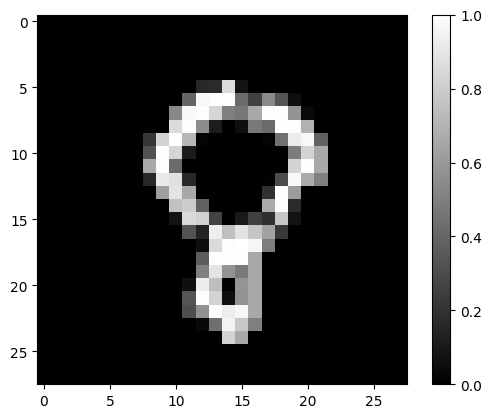

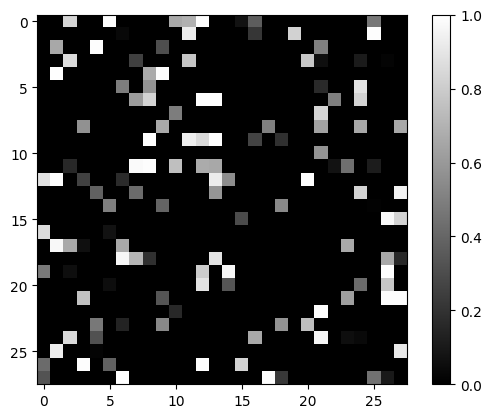

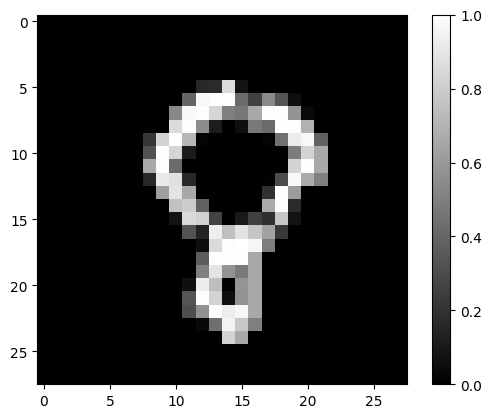

In [115]:
for i, data in enumerate(trainloader, 0):
    if i < 10:
        inputs, labels = data
        image = inputs[0]
        draw(image.view(28, 28))
        imageX = encode(image, 42)
        draw(imageX.view(28, 28))
        imageB = decode(imageX, 42)
        draw(imageB.view(28, 28))
        break
    

In [22]:
class SmallCNN(nn.Module):
    def __init__(self):
        super(SmallCNN, self).__init__()
        # Convolutional layers
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=1)  # Output: 32x32x32
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)  # Output: 32x32x64
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)  # Output: 32x32x128
        
        # Max-pooling layer
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)  # Reduces spatial dimensions by half
        
        # Fully connected layers
        self.fc1 = nn.Linear(128 * 4 * 4, 256)  # 128 feature maps of 4x4 size
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 10)  # Output layer for 10 classes

        # Dropout (optional for regularization)
        self.dropout = nn.Dropout(0.5)
        
    def forward(self, x):
        # Convolutional layers with ReLU and pooling
        x = self.pool(F.relu(self.conv1(x)))  # Output: 16x16x32
        x = self.pool(F.relu(self.conv2(x)))  # Output: 8x8x64
        x = self.pool(F.relu(self.conv3(x)))  # Output: 4x4x128
        
        # Flatten the feature maps
        x = x.view(-1, 128 * 4 * 4)
        
        # Fully connected layers with ReLU and optional dropout
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        x = self.dropout(x)
        
        # Output layer
        x = self.fc3(x)
        return x

In [26]:
cir1 = SmallCNN()
cir2 = SmallCNN()

In [30]:
cirtrainloader1, cirtestloader1 = split_dataloader(dataloader1, train_ratio=0.8)
cirtrainloader2, cirtestloader2 = split_dataloader(dataloader1, train_ratio=0.8)

In [102]:
cccir1 = SmallCNN()
cccir2 = SmallCNN()
cccirtrainloader1, cccirtestloader1 = split_dataloader(dataloader1, train_ratio=0.8)
cccirtrainloader2, cccirtestloader2 = split_dataloader(dataloader2, train_ratio=0.8)

In [103]:
train(cccir1, epochs=12, trainloader=cccirtrainloader1)
train(cccir2, epochs=12, trainloader=cccirtrainloader2)

Epoch 1, Mini-batch 100, Loss: 2.301
Epoch 1, Mini-batch 200, Loss: 2.271
Epoch 1, Mini-batch 300, Loss: 2.106
Epoch 2, Mini-batch 100, Loss: 1.857
Epoch 2, Mini-batch 200, Loss: 1.782
Epoch 2, Mini-batch 300, Loss: 1.702
Epoch 3, Mini-batch 100, Loss: 1.623
Epoch 3, Mini-batch 200, Loss: 1.536
Epoch 3, Mini-batch 300, Loss: 1.508
Epoch 4, Mini-batch 100, Loss: 1.443
Epoch 4, Mini-batch 200, Loss: 1.423
Epoch 4, Mini-batch 300, Loss: 1.357
Epoch 5, Mini-batch 100, Loss: 1.312
Epoch 5, Mini-batch 200, Loss: 1.272
Epoch 5, Mini-batch 300, Loss: 1.254
Epoch 6, Mini-batch 100, Loss: 1.164
Epoch 6, Mini-batch 200, Loss: 1.200
Epoch 6, Mini-batch 300, Loss: 1.155
Epoch 7, Mini-batch 100, Loss: 1.088
Epoch 7, Mini-batch 200, Loss: 1.050
Epoch 7, Mini-batch 300, Loss: 1.059
Epoch 8, Mini-batch 100, Loss: 0.998
Epoch 8, Mini-batch 200, Loss: 0.971
Epoch 8, Mini-batch 300, Loss: 0.962
Epoch 9, Mini-batch 100, Loss: 0.897
Epoch 9, Mini-batch 200, Loss: 0.933
Epoch 9, Mini-batch 300, Loss: 0.920
E

[230.0200114250183,
 227.1837830543518,
 205.7021015882492,
 194.188915848732,
 177.34935688972473,
 174.9258657693863,
 161.10176861286163,
 156.503187417984,
 147.82654893398285,
 145.0885214805603,
 138.4184511899948,
 138.28391993045807,
 126.8911657333374,
 127.2269771695137,
 117.99219650030136,
 119.92242223024368,
 113.16036593914032,
 108.47223109006882,
 102.08164685964584,
 102.01551008224487,
 94.65372306108475,
 94.38636702299118,
 87.36097186803818,
 88.56939893960953]

In [44]:
train(cir1, epochs=6, trainloader=cirtrainloader1)

Epoch 1, Mini-batch 100, Loss: 0.808
Epoch 1, Mini-batch 200, Loss: 0.849
Epoch 1, Mini-batch 300, Loss: 0.849
Epoch 2, Mini-batch 100, Loss: 0.767
Epoch 2, Mini-batch 200, Loss: 0.769
Epoch 2, Mini-batch 300, Loss: 0.780
Epoch 3, Mini-batch 100, Loss: 0.709
Epoch 3, Mini-batch 200, Loss: 0.709
Epoch 3, Mini-batch 300, Loss: 0.719
Epoch 4, Mini-batch 100, Loss: 0.648
Epoch 4, Mini-batch 200, Loss: 0.662
Epoch 4, Mini-batch 300, Loss: 0.662
Epoch 5, Mini-batch 100, Loss: 0.570
Epoch 5, Mini-batch 200, Loss: 0.604
Epoch 5, Mini-batch 300, Loss: 0.626
Epoch 6, Mini-batch 100, Loss: 0.527
Epoch 6, Mini-batch 200, Loss: 0.550
Epoch 6, Mini-batch 300, Loss: 0.579
Finished Training


[80.83085572719574,
 84.93447428941727,
 84.89885604381561,
 76.69193005561829,
 76.94777226448059,
 78.04237574338913,
 70.866489559412,
 70.93716603517532,
 71.94298648834229,
 64.75559365749359,
 66.17168620228767,
 66.22986155748367,
 56.98884844779968,
 60.36790609359741,
 62.5673828125,
 52.74333146214485,
 55.01522812247276,
 57.90563282370567]

In [45]:
train(cir2, epochs=6, trainloader=cirtrainloader2)

Epoch 1, Mini-batch 100, Loss: 0.840
Epoch 1, Mini-batch 200, Loss: 0.820
Epoch 1, Mini-batch 300, Loss: 0.846
Epoch 2, Mini-batch 100, Loss: 0.729
Epoch 2, Mini-batch 200, Loss: 0.753
Epoch 2, Mini-batch 300, Loss: 0.779
Epoch 3, Mini-batch 100, Loss: 0.682
Epoch 3, Mini-batch 200, Loss: 0.739
Epoch 3, Mini-batch 300, Loss: 0.694
Epoch 4, Mini-batch 100, Loss: 0.655
Epoch 4, Mini-batch 200, Loss: 0.623
Epoch 4, Mini-batch 300, Loss: 0.673
Epoch 5, Mini-batch 100, Loss: 0.563
Epoch 5, Mini-batch 200, Loss: 0.619
Epoch 5, Mini-batch 300, Loss: 0.604
Epoch 6, Mini-batch 100, Loss: 0.545
Epoch 6, Mini-batch 200, Loss: 0.549
Epoch 6, Mini-batch 300, Loss: 0.534
Finished Training


[84.03669291734695,
 82.01416221261024,
 84.56657147407532,
 72.90531522035599,
 75.33869394659996,
 77.86369204521179,
 68.20522978901863,
 73.898971170187,
 69.44169026613235,
 65.52048745751381,
 62.34795477986336,
 67.26042330265045,
 56.32840755581856,
 61.901998817920685,
 60.35220891237259,
 54.51890191435814,
 54.92327454686165,
 53.43038600683212]

In [46]:
test(cir1, testloader=cirtestloader1)
test(cir2, testloader=cirtestloader1)
test(cir1, testloader=cirtestloader2)
test(cir2, testloader=cirtestloader2)

Accuracy of the network on the 10000 test images: 68.41666666666667%
Accuracy of the network on the 10000 test images: 68.98333333333333%
Accuracy of the network on the 10000 test images: 68.5%
Accuracy of the network on the 10000 test images: 68.41666666666667%


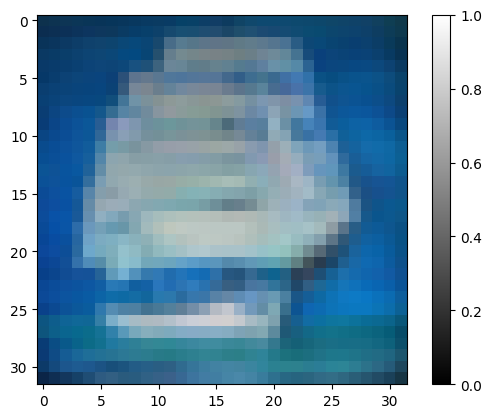

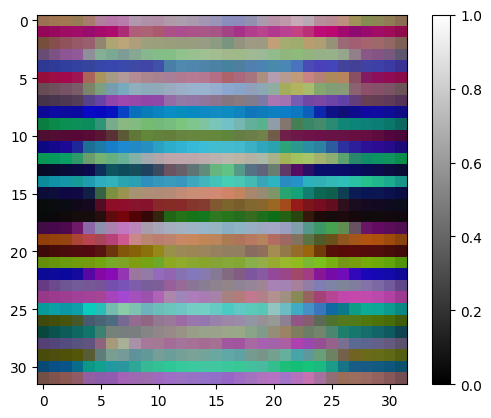

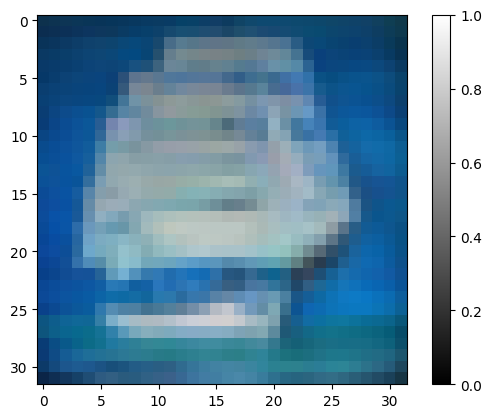

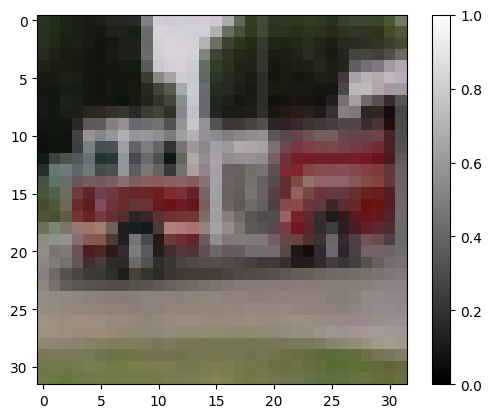

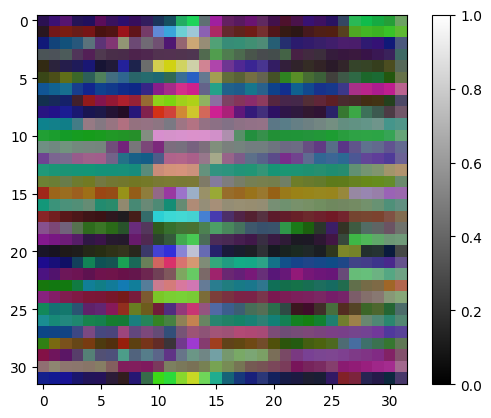

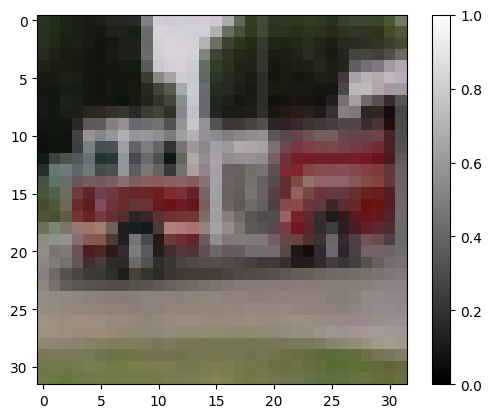

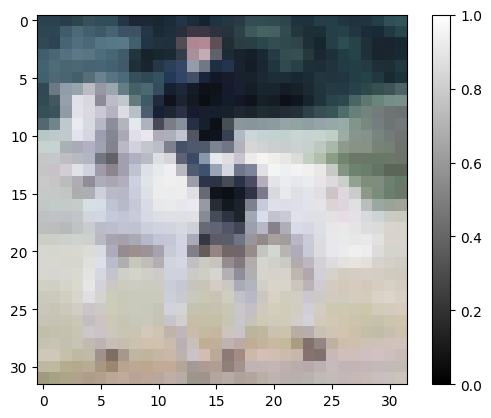

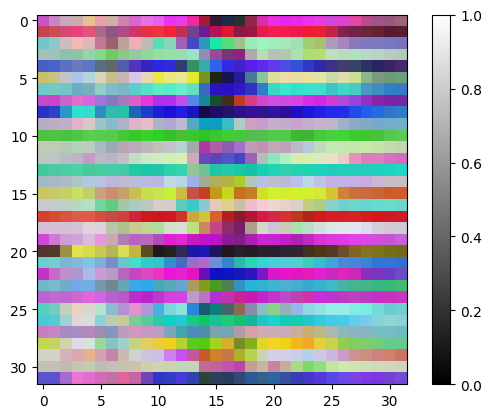

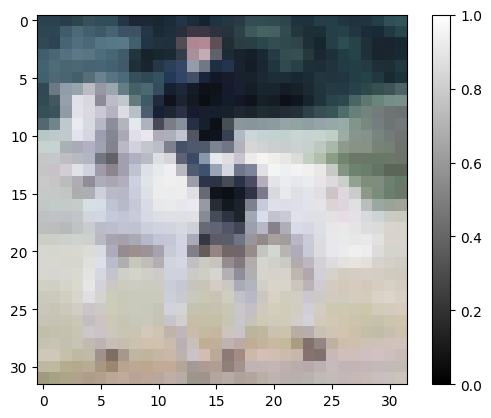

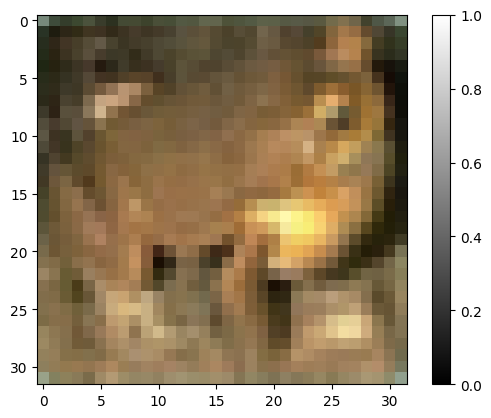

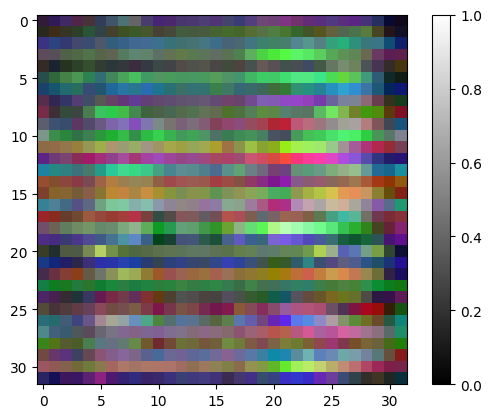

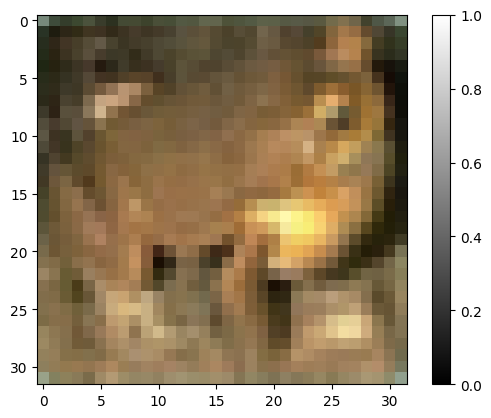

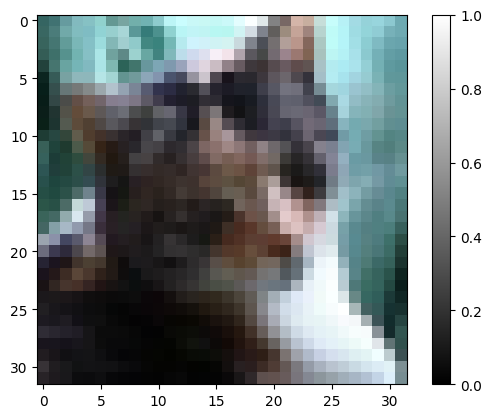

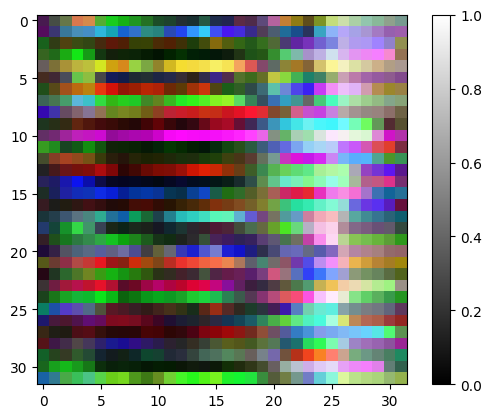

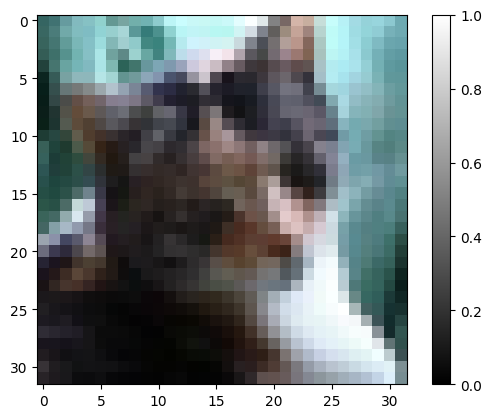

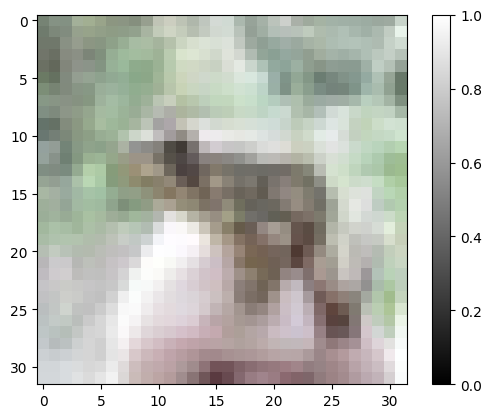

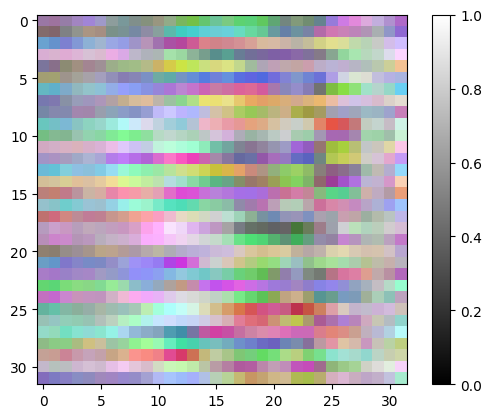

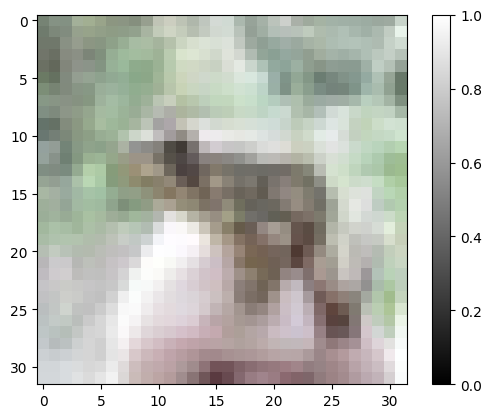

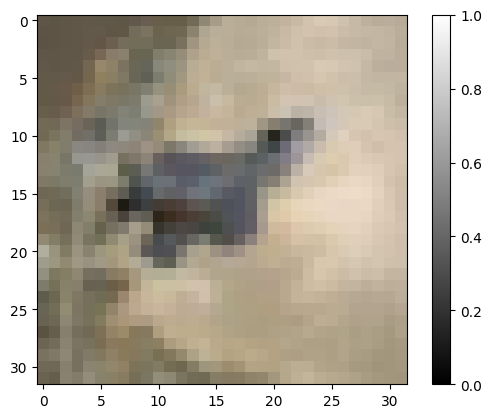

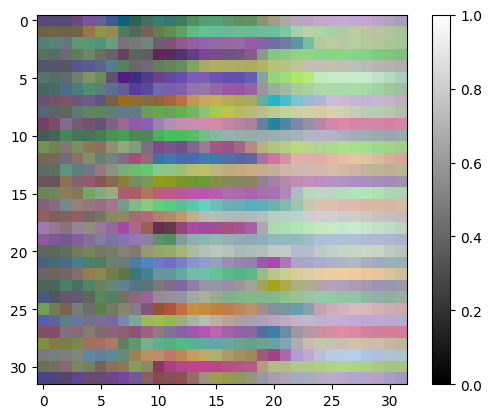

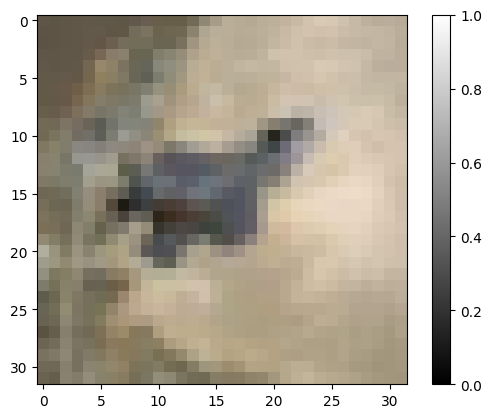

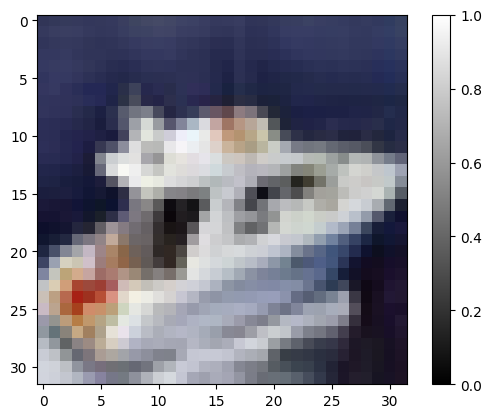

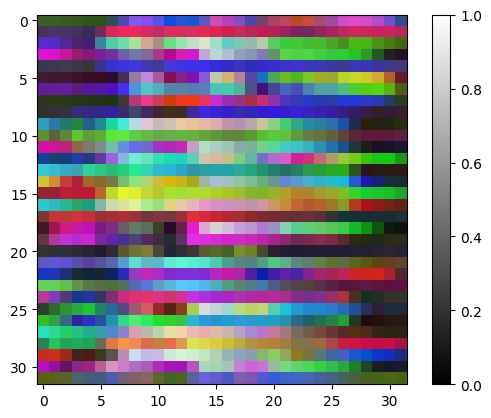

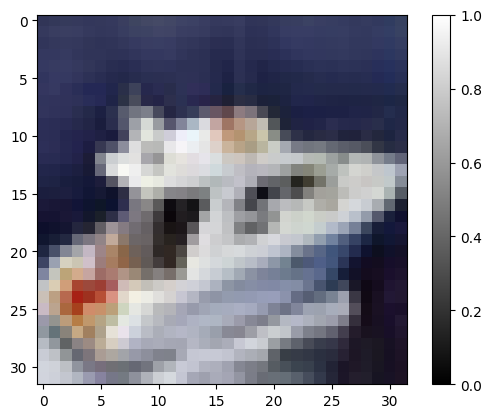

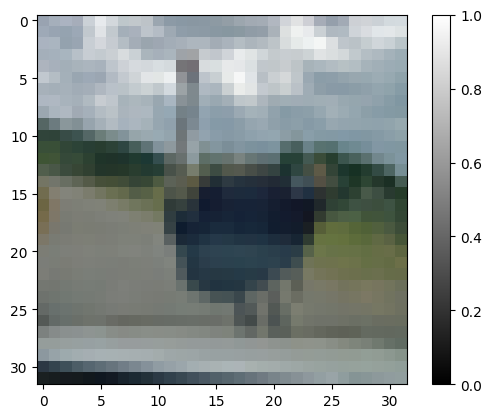

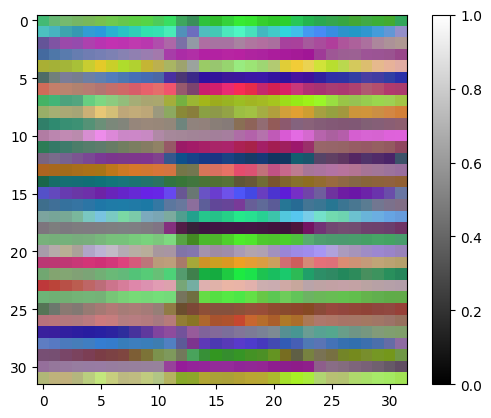

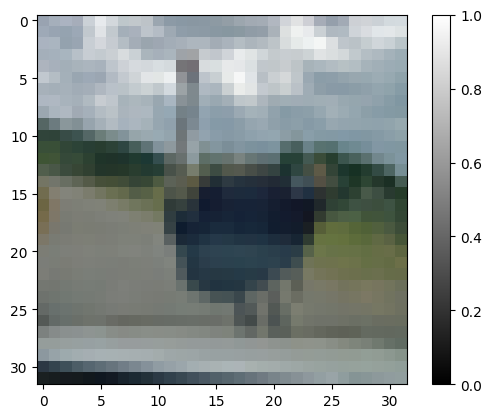

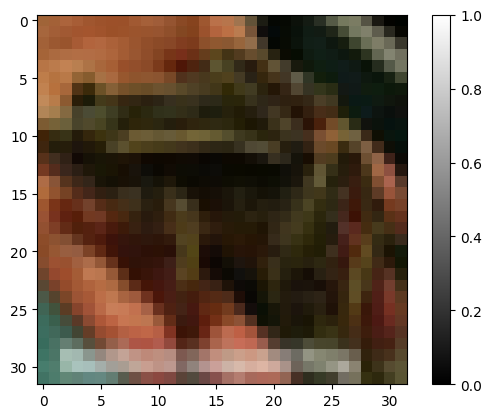

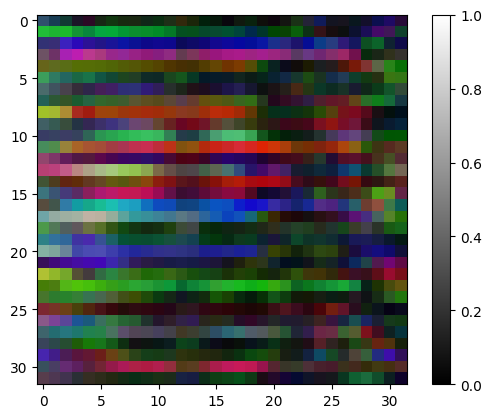

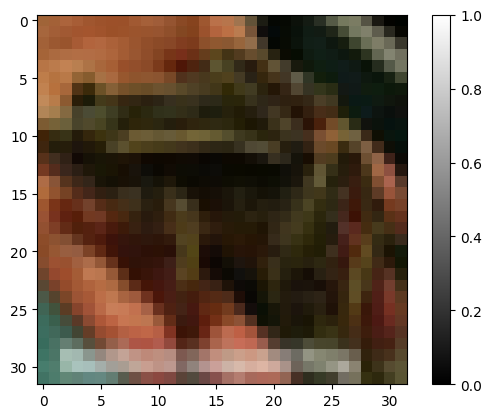

In [74]:
for i, data in enumerate(cirtrainloader2, 0):
    if i < 10:
        inputs, labels = data
        image = inputs[0]
        draw(image.permute(1, 2, 0))  # Change dimensions from (C, H, W) to (H, W, C)
        
        imageX = encode_cir(image, 42)
        draw(imageX.permute(1, 2, 0))
        
        imageB = decode_cir(imageX, 42)
        draw(imageB.permute(1, 2, 0))

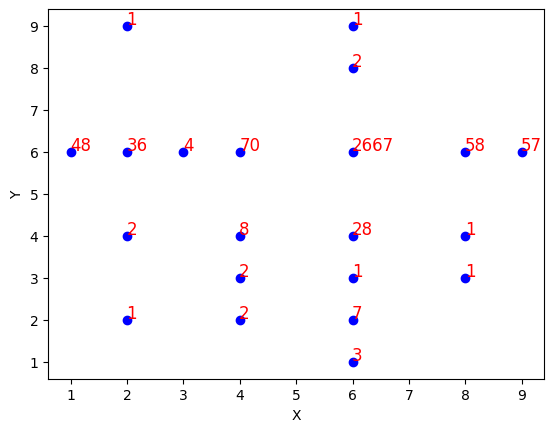

0.892

In [70]:
xs, ys = random_hash_answers_cir(cir1, cir2, iterations=3000, loader=cirtestloader1)
plot_2d_hist(xs, ys)

In [71]:
def encode_cir(image, hash_value):
    # Set a random seed based on the hash value for reproducibility
    np.random.seed(hash_value)
    
    # Reshape the image to a 2D array where each pixel is a row
    h, w, c = image.shape
    flattened_image = image.reshape(-1, c)
    
    # Generate a random permutation of indices based on the hash
    permuted_indices = np.random.permutation(flattened_image.shape[0])
    
    # Apply the permutation to the flattened image
    encoded_image = flattened_image[permuted_indices]
    
    # Reshape the encoded image back to its original shape
    encoded_image = encoded_image.reshape(h, w, c)
    
    return encoded_image

def decode_cir(encoded_image, hash_value):
    # Set a random seed based on the hash value for reproducibility
    np.random.seed(hash_value)
    
    # Reshape the encoded image to a 2D array where each pixel is a row
    h, w, c = encoded_image.shape
    flattened_image = encoded_image.reshape(-1, c)
    
    # Generate the permutation used during encoding
    permuted_indices = np.random.permutation(flattened_image.shape[0])
    
    # Compute the inverse permutation
    inverse_permutation = np.argsort(permuted_indices)
    
    # Apply the inverse permutation to restore the original image
    restored_image = flattened_image[inverse_permutation]
    
    # Reshape the restored image back to its original shape
    restored_image = restored_image.reshape(h, w, c)
    
    return restored_image

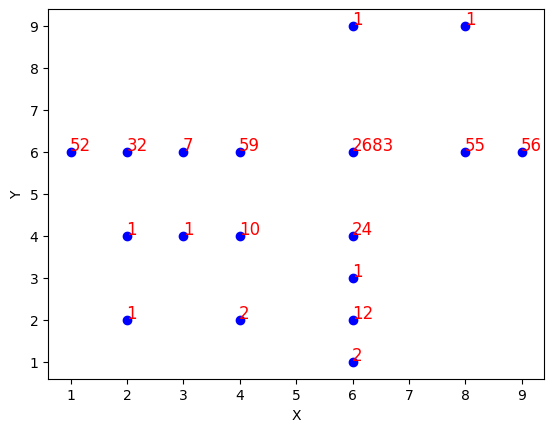

0.898

In [73]:
xs, ys = random_hash_answers_cir(cir1, cir2, iterations=3000, loader=cirtestloader1)
plot_2d_hist(xs, ys)

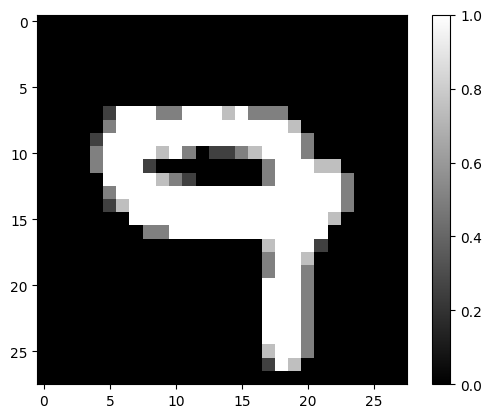

In [110]:
for i, data in enumerate(trainloader, 0):
    draw(data[0][0].view(28, 28))
    break
    if i < 10:
        inputs, labels = data
        image = inputs[0]
        draw(image.view(28, 28))
        imageX = encode(image, 42)
        draw(imageX.view(28, 28))
        imageB = decode(imageX, 42)
        draw(imageB.view(28, 28))
        break

In [114]:
test(cnn4)

Accuracy of the network on the 10000 test images: 98.3%
